In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv('churndataset.csv')
x = dataset.iloc[:,3:-1]
y = dataset['Exited']
dataset['Exited'].value_counts()
dataset

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_onehot = pd.get_dummies(x, drop_first = True)
x_train, x_test, y_train, y_test = train_test_split(x_onehot,y,test_size=0.2,random_state=42, stratify=y)
x_train.describe()

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, InputLayer

from tensorflow.keras.optimizers import Adam

input_shape = x_train.shape[1:]
class_weight = y.value_counts().to_dict()
total_sample = sum(class_weight.values())
class_weight = [total_sample/(len(class_weight)*class_weight[0]), total_sample/(len(class_weight)*class_weight[1])]
class_weight

model = Sequential()
model.add(InputLayer(input_shape))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 18177 (71.00 KB)
Trainable params: 18177 (71.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
model.compile(optimizer = Adam(learning_rate = 0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [11]:
class_weight = {0 : 0.6279040562602034, 1 : 2.454590083456063}
class_weight

{0: 0.6279040562602034, 1: 2.454590083456063}

In [40]:
history = model.fit(x_train, y_train, batch_size = 32, epochs = 10, class_weight = class_weight)

Epoch 1/10
250/250 [==============================] - 1s 4ms/step - loss: 0.2974 - accuracy: 0.8625
Epoch 2/10
250/250 [==============================] - 1s 3ms/step - loss: 0.2901 - accuracy: 0.8659
Epoch 3/10
250/250 [==============================] - 1s 3ms/step - loss: 0.2862 - accuracy: 0.8634
Epoch 4/10
250/250 [==============================] - 1s 4ms/step - loss: 0.2847 - accuracy: 0.8681
Epoch 5/10
250/250 [==============================] - 1s 3ms/step - loss: 0.2744 - accuracy: 0.8741
Epoch 6/10
250/250 [==============================] - 1s 3ms/step - loss: 0.2741 - accuracy: 0.8724
Epoch 7/10
250/250 [==============================] - 1s 3ms/step - loss: 0.2693 - accuracy: 0.8709
Epoch 8/10
250/250 [==============================] - 1s 3ms/step - loss: 0.2674 - accuracy: 0.8770
Epoch 9/10
250/250 [==============================] - 1s 3ms/step - loss: 0.2627 - accuracy: 0.8804
Epoch 10/10
250/250 [==============================] - 1s 3ms/step - loss: 0.2564 - accuracy: 0.8804

In [41]:
history.history

{'loss': [0.2973540425300598,
  0.2900655269622803,
  0.2862280607223511,
  0.2846950590610504,
  0.274363249540329,
  0.2741367518901825,
  0.26931485533714294,
  0.2674426734447479,
  0.26271700859069824,
  0.2563552260398865],
 'accuracy': [0.862500011920929,
  0.8658750057220459,
  0.8633750081062317,
  0.8681250214576721,
  0.8741250038146973,
  0.8723750114440918,
  0.8708750009536743,
  0.8769999742507935,
  0.8803750276565552,
  0.8803750276565552]}

In [22]:
history = model.fit(x_train, y_train, batch_size = 32, epochs = 10, class_weight = class_weight, validation_split = 0.1)

Epoch 1/10
225/225 [==============================] - 1s 4ms/step - loss: 0.3393 - accuracy: 0.8424 - val_loss: 0.2908 - val_accuracy: 0.8625
Epoch 2/10
225/225 [==============================] - 1s 4ms/step - loss: 0.3263 - accuracy: 0.8485 - val_loss: 0.3585 - val_accuracy: 0.8338
Epoch 3/10
225/225 [==============================] - 1s 3ms/step - loss: 0.3248 - accuracy: 0.8467 - val_loss: 0.3602 - val_accuracy: 0.8250
Epoch 4/10
225/225 [==============================] - 1s 3ms/step - loss: 0.3165 - accuracy: 0.8503 - val_loss: 0.3318 - val_accuracy: 0.8487
Epoch 5/10
225/225 [==============================] - 1s 4ms/step - loss: 0.3135 - accuracy: 0.8536 - val_loss: 0.3528 - val_accuracy: 0.8225
Epoch 6/10
225/225 [==============================] - 1s 4ms/step - loss: 0.3068 - accuracy: 0.8558 - val_loss: 0.3537 - val_accuracy: 0.8338
Epoch 7/10
225/225 [==============================] - 1s 4ms/step - loss: 0.3069 - accuracy: 0.8590 - val_loss: 0.4483 - val_accuracy: 0.7812
Epoch 

In [35]:
history.history

{'loss': [0.33931392431259155,
  0.3262852728366852,
  0.32479557394981384,
  0.31648752093315125,
  0.3135044276714325,
  0.30675825476646423,
  0.30687251687049866,
  0.30312249064445496,
  0.2986522316932678,
  0.29427260160446167],
 'accuracy': [0.8423610925674438,
  0.8484722375869751,
  0.846666693687439,
  0.8502777814865112,
  0.8536111116409302,
  0.8558333516120911,
  0.8590278029441833,
  0.8623611330986023,
  0.8633333444595337,
  0.8627777695655823],
 'val_loss': [0.2907716929912567,
  0.3584846556186676,
  0.3601973354816437,
  0.33183181285858154,
  0.3528106212615967,
  0.353722482919693,
  0.448272705078125,
  0.32221904397010803,
  0.313289612531662,
  0.3375851809978485],
 'val_accuracy': [0.862500011920929,
  0.8337500095367432,
  0.824999988079071,
  0.8487499952316284,
  0.8224999904632568,
  0.8337500095367432,
  0.78125,
  0.8412500023841858,
  0.84375,
  0.84375]}

In [36]:
hist = pd.DataFrame(history.history)
hist

,loss,accuracy,val_loss,val_accuracy
0,0.339314,0.842361,0.290772,0.86250
1,0.326285,0.848472,0.358485,0.83375
2,0.324796,0.846667,0.360197,0.82500
3,0.316488,0.850278,0.331832,0.84875
4,0.313504,0.853611,0.352811,0.82250
5,0.306758,0.855833,0.353722,0.83375
6,0.306873,0.859028,0.448273,0.78125
7,0.303122,0.862361,0.322219,0.84125
8,0.298652,0.863333,0.313290,0.84375
9,0.294273,0.862778,0.337585,0.84375


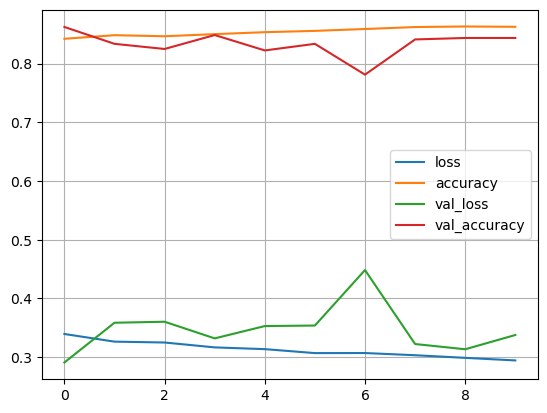

In [38]:
hist.plot()
plt.grid()


In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 18177 (71.00 KB)
Trainable params: 18177 (71.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
